# 查看缺失值

<Axes: >

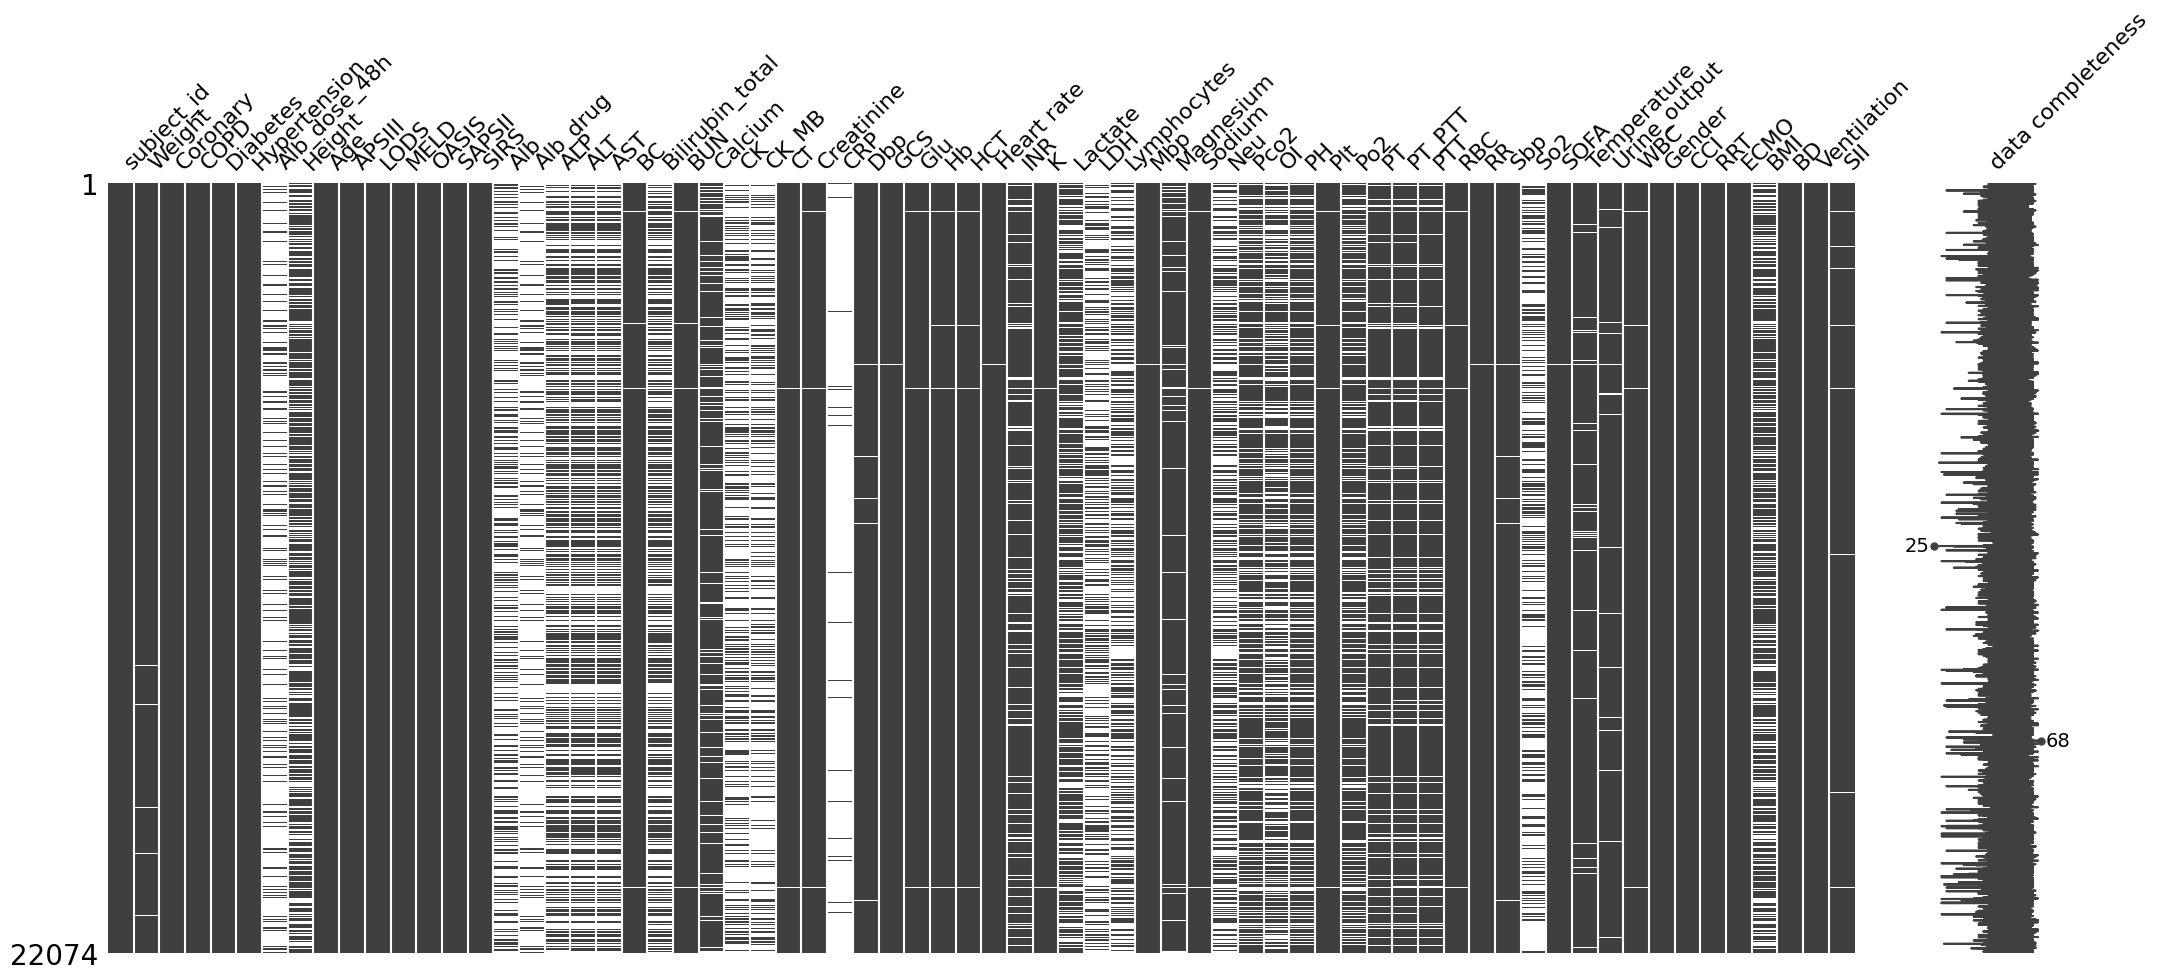

In [1]:
import os
import pandas as pd

data = pd.read_excel('forecast2024.4.29.xlsx')

import missingno as msno
msno.matrix(data, labels=True) # 无效数据密度显示



# 查看缺失值，并删除0.25以上缺失

In [3]:
import pandas as pd
import numpy as np

data = pd.read_excel(r"forecast2024.4.29.xlsx")
validation = pd.read_excel(r"validation2024.4.29.xlsx")


data_= data.dropna(axis=0, thresh=data.shape[1]*0.75)
validation_ = validation.dropna(axis=0, thresh=validation.shape[1] * 0.75)

data_= data_.dropna(axis=1, thresh=data.shape[1]*0.6)


data_null_ration = ((data_.isnull().sum())/data_.shape[0]).sort_values(ascending=False).map(lambda x:"{:.2%}".format(x))
data_null_ration.to_excel("data_null_ration.xlsx")

validation_null_ration = ((validation_.isnull().sum())/validation_.shape[0]).sort_values(ascending=False).map(lambda x:"{:.2%}".format(x)).to_excel("validation_null_ration.xlsx")



data_.to_excel('data_0.25.xlsx')
validation_.to_excel('validation_0.25.xlsx')


x_name = data_.columns.to_list()
v_name = validation_.columns.to_list()


# 统计

C:\Users\myl30\AppData\Local\Temp\ipykernel_20764\757967998.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna({i:value},inplace=True)
C:\Users\myl30\AppData\Local\Temp\ipykernel_20764\757967998.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna({i:value},inplace=True)
C:\Users\myl30\AppData\Local\Temp\ipykernel_20764\757967998.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna({i:value},inplac

T统计量： -0.8745103112594266
P值： 0.4229625109701139
T统计量： -4.068958237488089
P值： 0.0005007564070543534
T统计量： 7.797561606282265
P值： 3.039777079844613e-11
T统计量： -1.1235112378303247
P值： 0.33633791157425225
T统计量： 1.044257876317406
P值： 0.36031631892478566
T统计量： 4.550851762081678
P值： 0.0001441993959473013
T统计量： -0.799858727429035
P值： 0.44715343200025126
T统计量： 1.3612808123513895
P值： 0.2488910024959065
T统计量： 5.031319193871476
P值： 2.5692437828106155e-05
T统计量： -28.86197338577173
P值： 7.440483284531199e-140
T统计量： -30.957619377149868
P值： 6.781889947968501e-159
T统计量： -3.378869593034195
P值： 0.004914494861284994
T统计量： -25.41052018827431
P值： 4.563725989167883e-108
T统计量： -8.063400553829911
P值： 9.244042125068813e-12
T统计量： -5.54780080061546
P值： 2.8534942083650513e-06
T统计量： -1.509984562650904
P值： 0.21386083705818293
T统计量： -2.5718091250186617
P值： 0.03064609436851582
T统计量： 1.99534434537613
P值： 0.0940993973816309
T统计量： -3.6711972550476717
P值： 0.0017878650640351268
T统计量： -13.38373614383199
P值： 7.654138496281328e-

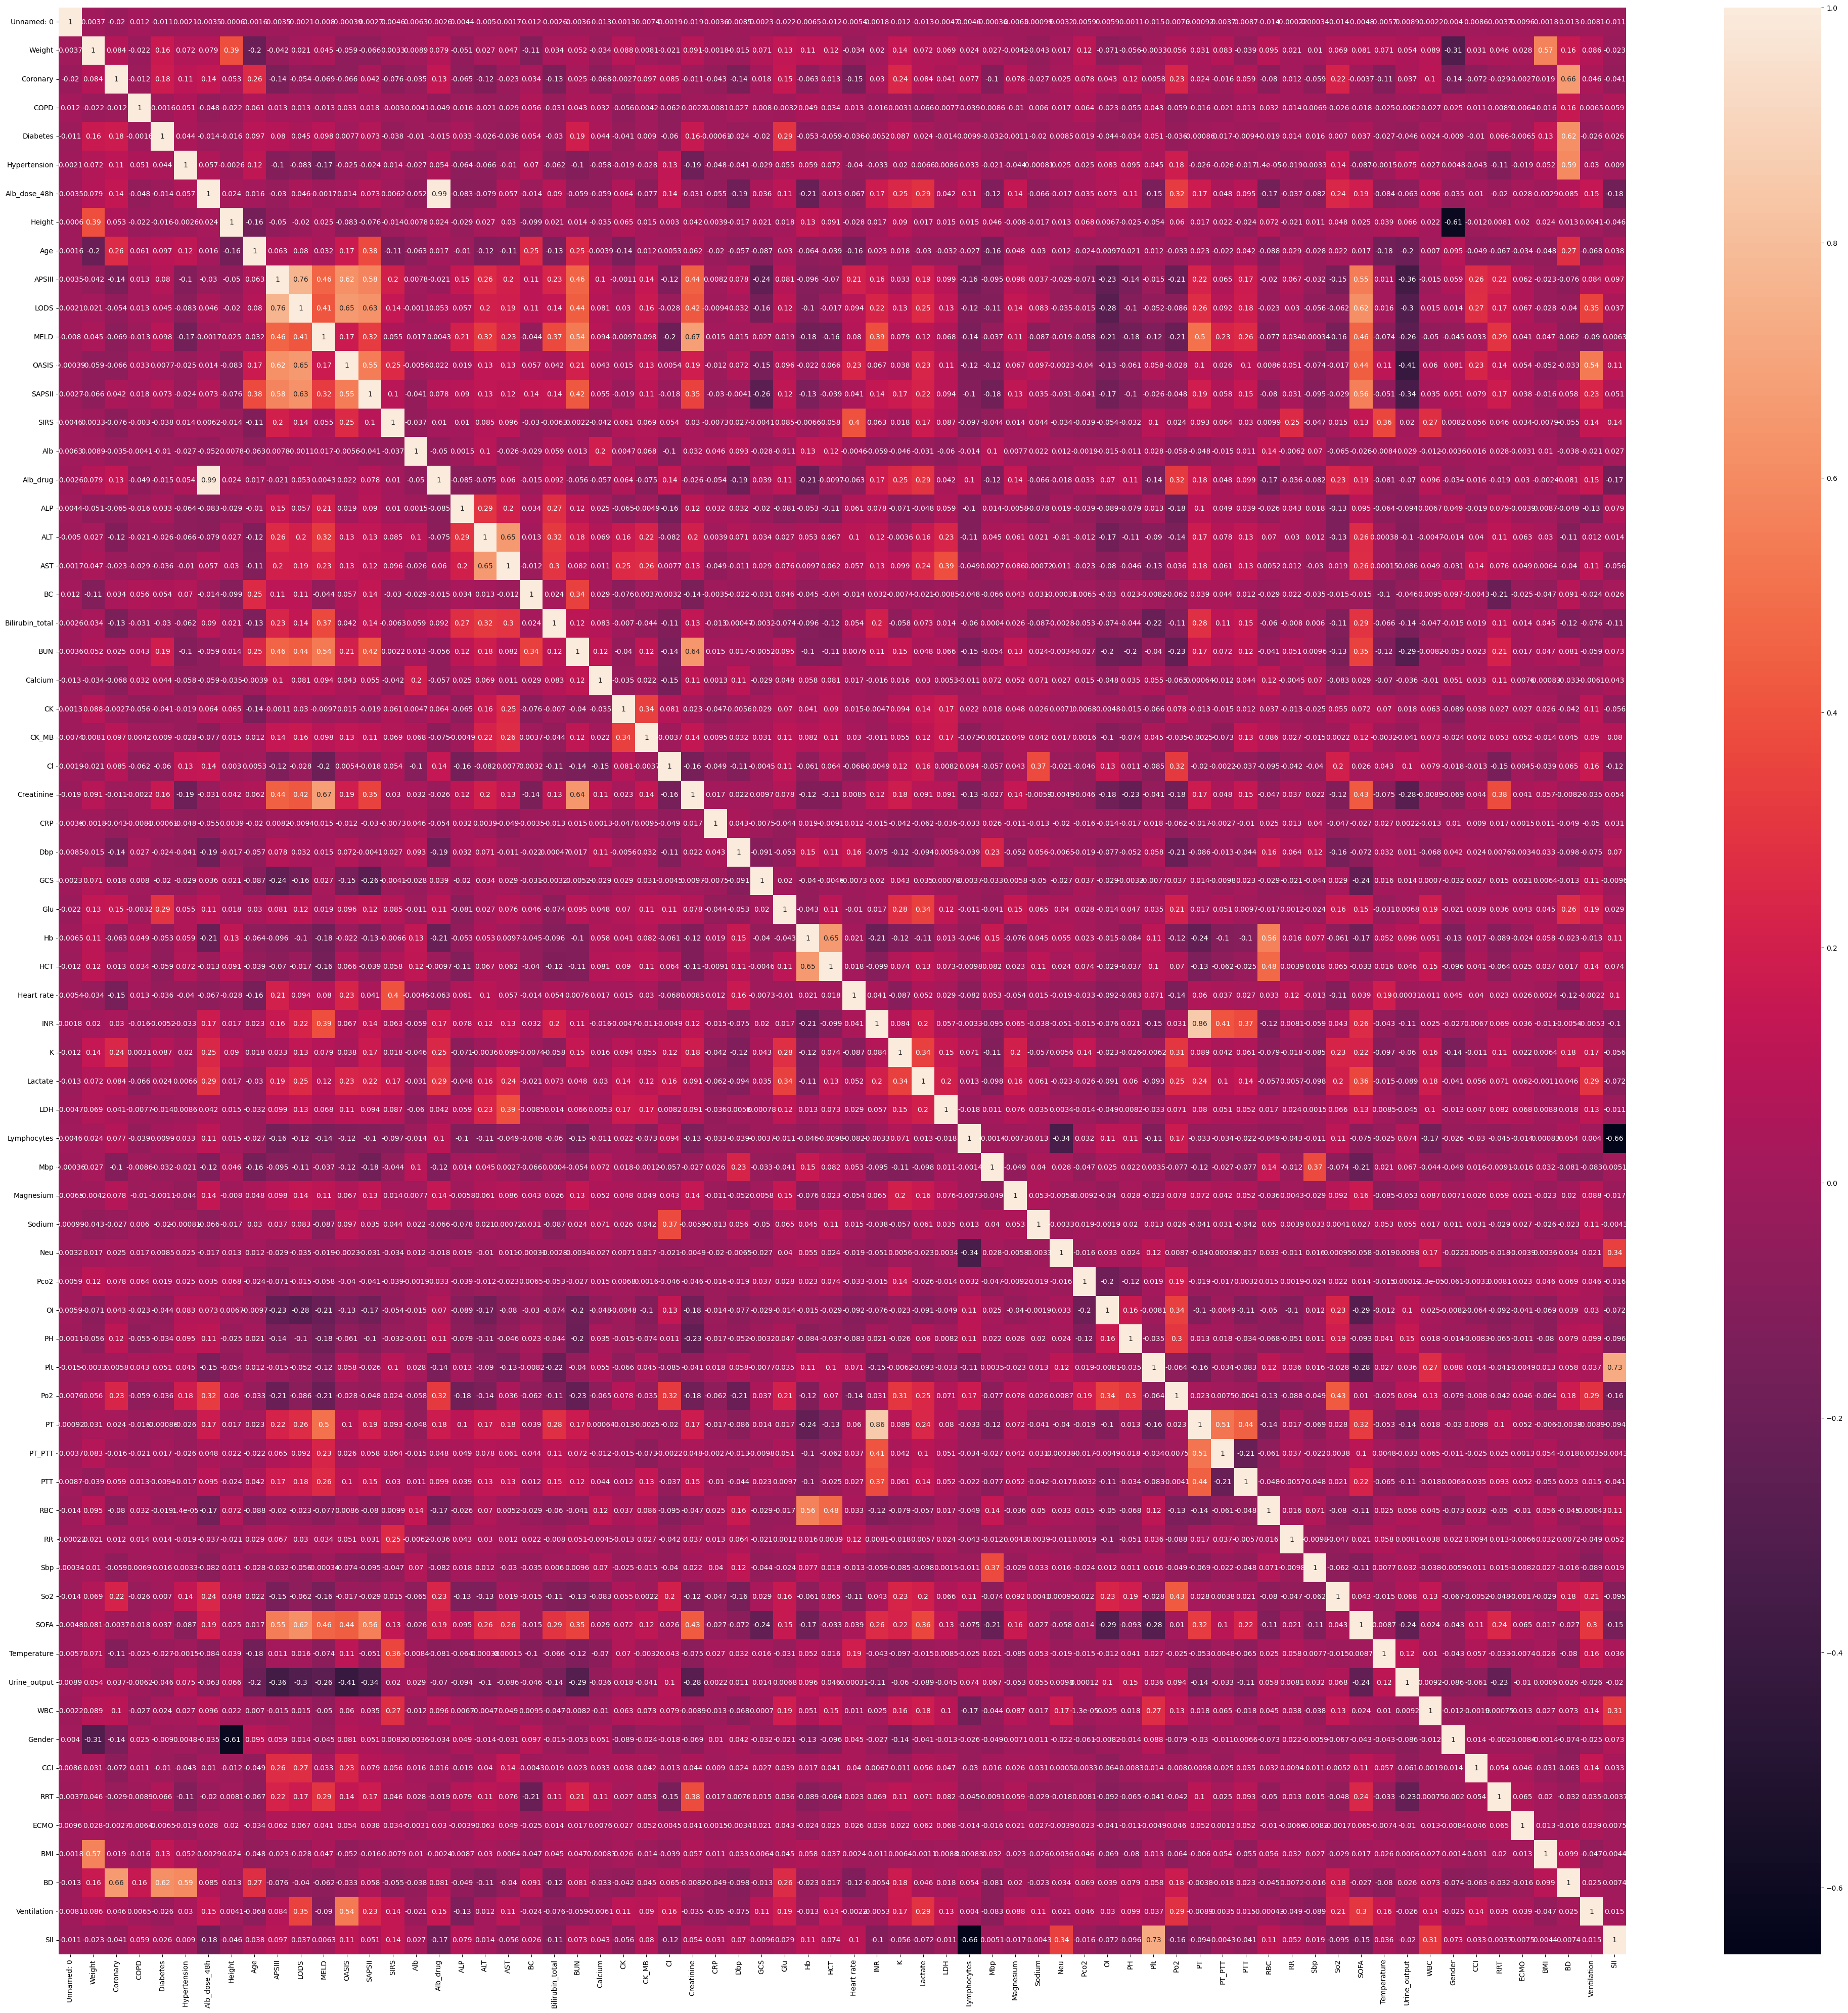

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


#选择需要统计以及筛选出 需要的特征，注意区分训练集和验证集
data = pd.read_excel(r'./data_0.25.xlsx')
data = data.dropna(thresh=0.75*data.shape[1],axis=0)

import json
with open('config.json','r',encoding='utf8') as f:
    config = json.load(f)
config = dict(config)
fill_nan = config['fill_nan']
transform = config["transform"]
X_name = config['x']
y_name = config['y']

def fill_nan_config(fill_nan,data):
    for i,j in fill_nan.items():
        if j=='mean':
            value = data[i].mean()

        elif j=='median':
            value = data[i].median()

        elif j=="mode":
            value = data[i].mode()

        else:
            value = j

        data.fillna({i:value},inplace=True)

class_CCI = data.groupby(by=['CCI'])
CCI_0 = class_CCI.get_group(0)
CCI_1 = class_CCI.get_group(1)
fill_nan_config(fill_nan,CCI_0)
fill_nan_config(fill_nan,CCI_1)

data_new = pd.concat([CCI_0,CCI_1])
# data_new['bmi'] = data_new['weight'] / (data_new['height'] * data_new['height'])
# data_new['sii'] = data_new['Neu'] * data_new['Plt'] / data_new['Lym']

# 将 inf 值替换为 NaN
data_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# 计算每列的平均值
mean_values = data_new.mean()

# 将 NaN 值替换为对应列的平均值x
data_new.fillna(mean_values, inplace=True)
data_new_des = data_new.copy()
for i,j in transform.items():
    for z in j:
        section = z[0]
        
        new = z[1]
        if "min" in section:
            data_new.loc[data_new[i] < section[1],i] = new
        elif "max" in section:
            data_new.loc[data_new[i] > section[0],i] = new
        else:
            data_new.loc[(data_new[i]>=section[0]) & (data_new[i]<=section[1]),i] = new


class_CCI_ = data_new.groupby(by=['CCI'])
CCI_0_ = class_CCI_.get_group(0)
CCI_1_ = class_CCI_.get_group(1)

class_name = list(transform.keys())
class_name.extend(['Gender','CCI'])

CCI_0_class = CCI_0_.loc[:,class_name]
CCI_0_lianxv = pd.DataFrame(CCI_0_).drop(columns=class_name)

CCI_1_class = CCI_1_.loc[:,class_name]
CCI_1_lianxv = pd.DataFrame(CCI_1_).drop(columns=class_name)


def replace_outliers_with_mean(df):
    for col in df.columns:
        mean = df.loc[:,col].mean()
        std = df.loc[:,col].std()
        lower_bound = mean - 2.5 * std
        upper_bound = mean + 2.5 * std
        df.loc[:,col] = df.loc[:,col].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)

# replace_outliers_with_mean(CCI_0_lianxv)
# replace_outliers_with_mean(CCI_1_lianxv)


class_CCI_des = data_new_des.groupby(by=['CCI'])
CCI_0_des = class_CCI_des.get_group(0)
CCI_1_des = class_CCI_des.get_group(1)
replace_outliers_with_mean(CCI_0_des)
replace_outliers_with_mean(CCI_1_des)
cci_0_describe = CCI_0_des.describe()
cci_1_describe = CCI_1_des.describe()


cci_0_describe.to_excel('cci_0_mean_std_IQR.xlsx')
cci_1_describe.to_excel('cci_1_mean_std_IQR.xlsx')

num_0 = CCI_0_.shape[0]
num_1 = CCI_1_.shape[0]
num = min(num_0,num_1)


import numpy as np
from scipy import stats
k_num = 1000
txt_dic = {}
name_T = []
num_count = 0
# 生成两组数据（示例数据，实际应用中需替换为您的数据）
for i,j in enumerate(CCI_0_.columns):
    t_statistic=0
    p_value=0
# 执行T检验
    if j == 'CCI' or j=='subject_id' or j=='icu_los':
        continue
    
    t1 = np.array(CCI_1_.iloc[:num,i])
    txt_dic[j] = []
    
    for z in range(k_num):
        t0 = np.array(CCI_0_.iloc[:,i])
        t0 = np.random.choice(t0,size=num,replace=False)

        temp_t_statistic, temp_p_value = stats.ttest_ind(t0, t1)
        t_statistic += temp_t_statistic
        p_value += temp_p_value

    t_statistic = t_statistic/k_num
    p_value = p_value/k_num
    print("T统计量：", t_statistic)
    print("P值：", p_value)
# 判断显著性水平
    alpha = 0.05
    if p_value < alpha:
        txt_dic[j] = f"\tT统计量：  {t_statistic}\n\tP值： {p_value}\n\t在显著性水平 {alpha} 下，拒绝原假设，说明组A和组B的均值存在显著性差异。"
        name_T.append(j)
        num_count +=1
    else:
        txt_dic[j] = f"\tT统计量：  {t_statistic}\n\tP值： {p_value}\n\t在显著性水平 {alpha} 下，接受原假设，说明组A和组B的均值没有显著性差异。"

with open("T检验结果.txt",'w',encoding='utf8') as f:
    for i,j in txt_dic.items():
        f.write(f'特征{i}结果如下:\n{j}\n')
    f.write('\n')
    for i in name_T:
        f.write(f'{i}\n')
print(num_count)


import numpy as np
from scipy import stats
k_num = 1000
txt_dic = {}
name_W = []
num_count = 0
log = []
# 生成两组数据（示例数据，实际应用中需替换为您的数据）
for i,j in enumerate(CCI_0_.columns):
    try:
        t_statistic=0
        p_value=0
    # 执行T检验
        if j == 'CCI' or j=='subject_id' or j=='icu_los':
            continue
        
        t1 = np.array(CCI_1_.iloc[:num,i])
        txt_dic[j] = []
        
        for z in range(k_num):
            t0 = np.array(CCI_0_.iloc[:,i])
            t0 = np.random.choice(t0,size=num,replace=False)
    
            temp_t_statistic, temp_p_value = stats.wilcoxon(t0, t1)
            t_statistic += temp_t_statistic
            p_value += temp_p_value
    
        t_statistic = t_statistic/k_num
        p_value = p_value/k_num
        print("Wilcoxon秩和检验统计量：", t_statistic)
        print("P值：", p_value)
    # 判断显著性水平
        alpha = 0.05
        if p_value < alpha:
            txt_dic[j] = f"\tWilcoxon秩和检验统计量：  {t_statistic}\n\tP值： {p_value}\n\t在显著性水平 {alpha} 下，拒绝原假设，说明组A和组B的中位数存在显著性差异。"
            name_W.append(j)
            num_count +=1
        else:
            txt_dic[j] = f"\tWilcoxon秩和检验统计量：  {t_statistic}\n\tP值： {p_value}\n\t在显著性水平 {alpha} 下，接受原假设，说明组A和组B的中位数没有显著性差异。"
    except:
        log.append(f'{j}无法进行运算,无差异性')
with open('无法进行运算.txt','w',encoding='utf8') as f:
    for i in log:
        f.write(f"{i}\n")


with open("Wilcoxon检验结果.txt",'w',encoding='utf8') as f:
    for i,j in txt_dic.items():
        f.write(f'特征{i}结果如下:\n{j}\n')
    f.write('\n')
    for i in name_T:
        f.write(f'{i}\n')
print(num_count)


name_T.extend(name_W)
name = set(name_T)
with open('features_select.txt','w',encoding='utf8') as f:
    for i in name:
        f.write(f'{i}\n')
        
        
import seaborn as sns
data_ = pd.concat([CCI_0_,CCI_1_]).astype(float)

data_.drop(columns=['subject_id'],inplace=True)
corr_df = pd.DataFrame(data_.corr(method='spearman'))
corr_df.to_excel('corr_all.xlsx')
plt.figure(figsize=(50,50))
sns.heatmap(corr_df,annot=True)

plt.savefig('热力图绘制.png')
plt.show()

def jianyan_lisanzhi(name,df,picture_name):
    """
    
    :param name: 离散值名字
    :param df: 数据集
    :return: 各分类占比，绘制图像,
    """
    count = df.loc[:,['CCI',name]].groupby(by=name).count()
    sum = np.real(count).sum()
    count['占比'] = count/sum
    count.to_excel(f'离散值统计/{picture_name}.xlsx')
    df.loc[:,['CCI',name]].groupby(by=[name]).count().plot(kind='bar')
    plt.savefig(f'离散值统计/{picture_name}.png')
    plt.close()    
    
    
import os
os.makedirs('离散值统计') if '离散值统计' not in os.listdir() else print()



for i in class_name:
    if i =='CCI':
        continue
    jianyan_lisanzhi(i,CCI_1_class,f'{i}_CCI_1')
    jianyan_lisanzhi(i,CCI_0_class,f"{i}_CCI_0")
    

# 回归检测

In [5]:
import os

import pandas as pd

data = pd.read_excel('data_0.25.xlsx')
data_val = pd.read_excel('validation_0.25.xlsx')


Age=[
      [["min",18],0],
      [[18,30],1],
      [[30,39],2],
      [[39,49],3],
      [[49,59],4],
      [[59,69],5],
      [[69,79],6],
      [[79,"max"],7]
    ]

for i,j in Age:
    
    section = i
        
    new = j
    if "min" in section:
        data.loc[data['Age'] < section[1],'Age'] = new
        data_val.loc[data_val['Age'] < section[1],'Age'] = new
    elif "max" in section:
        data.loc[data['Age'] > section[0],'Age'] = new
        data_val.loc[data_val['Age'] > section[0],'Age'] = new
    else:
        data.loc[(data['Age']>=section[0]) & (data['Age']<=section[1]),'Age'] = new
        data_val.loc[(data_val['Age']>=section[0]) & (data_val['Age']<=section[1]),'Age'] = new
        
import json
with open('config.json','r',encoding='utf8') as f:
    config = json.load(f)
config = dict(config)
fill_nan = config['fill_nan']
transform = config["transform"]
X_name = config['x']
y_name = config['y']

def fill_nan_config(fill_nan,data):
    for i,j in fill_nan.items():
        if j=='mean':
            value = data[i].mean()

        elif j=='median':
            value = data[i].median()

        elif j=="mode":
            value = data[i].mode()

        else:
            value = j

        data.fillna({i:value},inplace=True)

class_CCI = data.groupby(by=['CCI'])
class_CCI_val = data_val.groupby(by=['CCI'])

ls=[]
ls_val = []
for i,j in class_CCI:
    fill_nan_config(fill_nan,j)
    ls.append(j)


for i,j in class_CCI_val:
    fill_nan_config(fill_nan,j)
    ls_val.append(j)

    
data_new=pd.concat(ls)
data_new['BMI'] = data_new['Weight']/(data_new['Height']*data_new['Height'])
data_new['SII'] = data_new['Neu']*data_new['Plt']/data_new['Lymphocytes']

data_val = pd.concat(ls_val)
data_val['BMI'] = data_val['Weight']/(data_val['Height']*data_val['Height'])
data_val['SII'] = data_val['Neu']*data_val['Plt']/data_val['Lymphocytes']

for i,j in transform.items():
    for z in j:
        section = z[0]
        
        new = z[1]
        if "min" in section:
            data_new.loc[data_new[i] < section[1],i] = new
            data_val.loc[data_val[i] < section[1],i] = new
            
        elif "max" in section:
            data_new.loc[data_new[i] > section[0],i] = new
            data_val.loc[data_val[i] > section[0],i] = new
        else:
            data_new.loc[(data_new[i]>=section[0]) & (data_new[i]<=section[1]),i] = new
            data_val.loc[(data_val[i]>=section[0]) & (data_val[i]<=section[1]),i] = new

# if X_name['drop']:
#     co = [y_name]
#     co.extend(X_name['drop'])
#     x = data_new.drop(columns=co)
# else:
#     x = data_new.loc[:,X_name['use']]
with open('features_select.txt','r',encoding='utf8') as f:
    name = f.readlines()
name =[str(i).replace('\n','') for i in name]
x = data_new.loc[:,name]
y = data_new.loc[:,y_name]
x_val = data_val.loc[:,name]
y_val = data_val.loc[:,y_name]

import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
# 将 inf 值替换为 NaN
x.replace([np.inf, -np.inf], np.nan, inplace=True)

# 计算每列的平均值
mean_values = x.mean()
# 将 NaN 值替换为对应列的平均值x
x.fillna(mean_values, inplace=True)

# 将 inf 值替换为 NaN
x_val.replace([np.inf, -np.inf], np.nan, inplace=True)

# 计算每列的平均值
# 将 NaN 值替换为对应列的平均值x
x_val.fillna(mean_values, inplace=True)


x_copy = x.copy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
standard = StandardScaler()
x = standard.fit_transform(x)
X_train_resampled = standard.transform(X_train_resampled)
X_train = standard.transform(X_train)
X_test = standard.transform(X_test)

X_val = standard.transform(x_val)
y_val = y_val



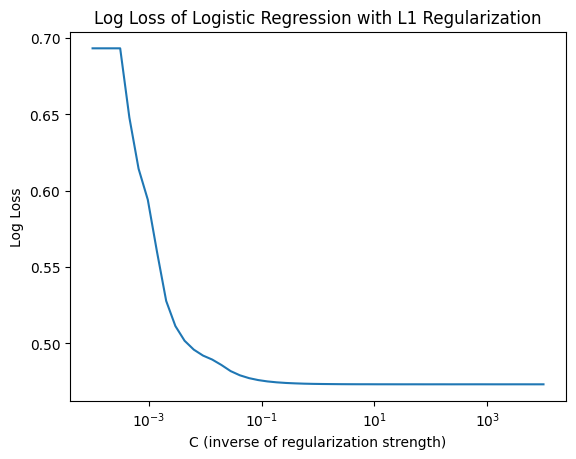

In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import log_loss  # 使用对数损失（交叉熵损失）  
from sklearn.datasets import make_classification  # 生成分类数据集  
  
# 生成模拟分类数据集  

# 定义C值（正则化强度的倒数）的范围  
C_values = np.logspace(-4, 4, 50)  
  
# 初始化一个空的列表来存储对数损失  
log_loss_values = []  
  
# 对每个C值训练模型并计算对数损失  
for C in C_values:  
    logreg = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)  
    logreg.fit(X_train_resampled, y_train_resampled)  
    y_pred_prob = logreg.predict_proba(X_val)  
    log_loss_val = log_loss(y_val, y_pred_prob)  
    log_loss_values.append(log_loss_val)  
  
# 绘制对数损失随C值变化的曲线  
plt.plot(C_values, log_loss_values)  
plt.xscale('log')  
plt.xlabel('C (inverse of regularization strength)')  
plt.ylabel('Log Loss')  
plt.title('Log Loss of Logistic Regression with L1 Regularization')  
plt.show()

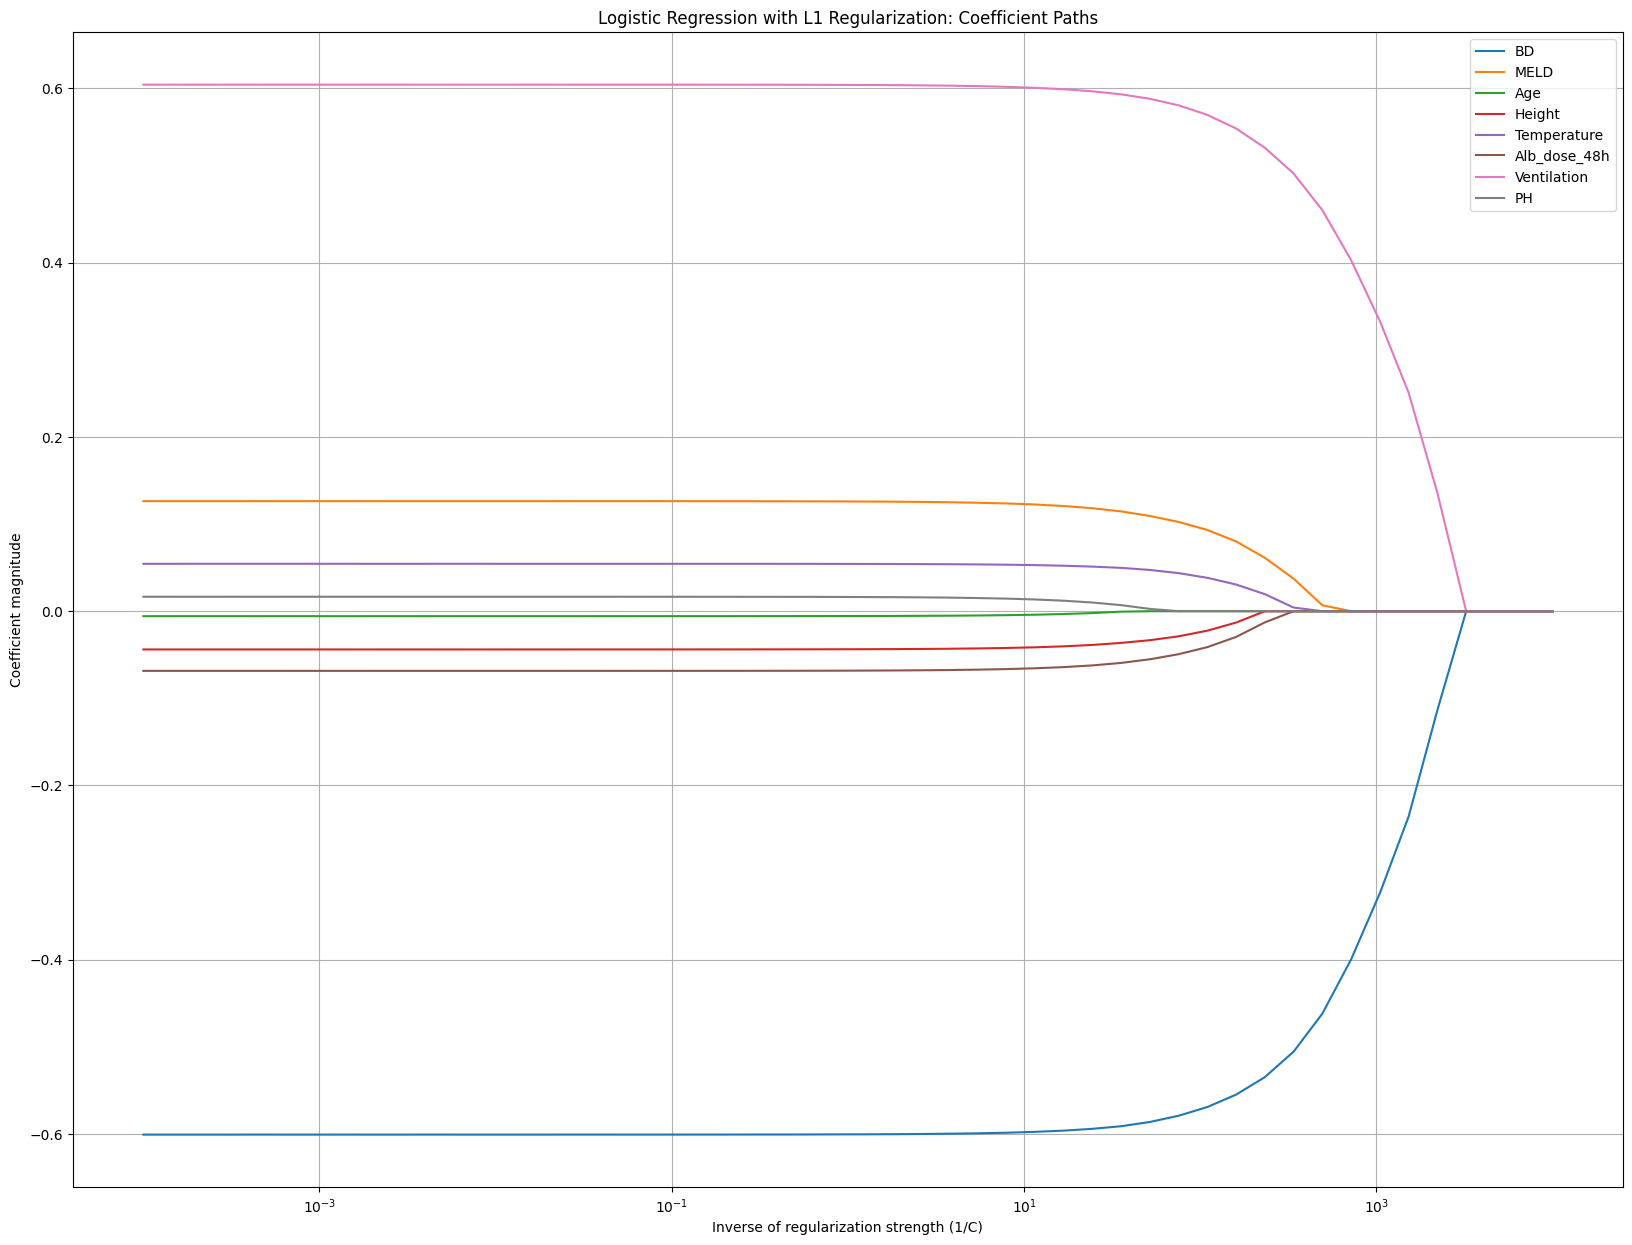

In [7]:

# 定义C值（正则化强度的倒数）的范围  
C_values = np.logspace(-4, 4, 50)  
  
# 初始化一个空的列表来存储系数  
coefs = []  
  
# 对每个C值训练模型并保存系数  
for C in C_values:  
    logreg = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)  
    logreg.fit(X_train_resampled, y_train_resampled)  
    coefs.append(logreg.coef_[0])  # 假设我们只有一个类（二分类），所以只取第一个类的系数  
  
# 将系数列表转换为numpy数组，方便操作  
coefs = np.array(coefs)  
  
# 绘制图像  
plt.figure(figsize=(20, 15))  
  
# 对于每个特征，绘制其系数随C值变化的图像  
for i in range(X_train_resampled.shape[1]):  
    plt.plot(1/C_values, coefs[:, i], label=f'{x_copy.columns[i]}')  
  
plt.xscale('log')  
plt.xlabel('Inverse of regularization strength (1/C)')  
plt.ylabel('Coefficient magnitude')  
plt.title('Logistic Regression with L1 Regularization: Coefficient Paths')  
plt.legend()  
plt.grid(True)  
plt.show()

In [8]:
num = X_train_resampled.shape[1]

c = list(1/C_values)

ls = list(zip([c]*num,[list(coefs[:,i]) for i in range(num)]))



In [ ]:
dic_ = {}

In [ ]:
dic_ = {i:j for i,j in zip(x_copy.columns.tolist(),ls)}

In [ ]:
import json

In [ ]:
json.dump(dic_,open('dic.json','w'))

In [ ]:
import shap  

  
# 假设您已经有一个DataFrame df，其中包含特征和目标变量  

# 创建一个SHAP解释器，并指定特征名称  
explainer = shap.LinearExplainer(logreg, X_train, feature_names=x_copy.columns)  
  
# 计算测试集的SHAP值  
shap_values = explainer(X_test)  
  
# 可视化摘要图，包括特征名称  
shap.summary_plot(shap_values, X_test, feature_names=x_copy.columns)  

# 或者，如果您想要查看单个实例的SHAP值  
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [ ]:
len(x_copy.columns)

## 上述未显示完全，只是展示部分shap

# 分类模型

### 根据上述的loass 自行选择使用的特征 并写入到feature-select.txt,对他进行复写，每一个特征占一行

### 以及修改config.json中的补充null值方式

### 去执行分类模型